In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
data = unpickle('/Users/apple/Downloads/cifar-10-batches-py/data_batch_1')

In [3]:
imgs = data[b'data'].reshape(10000,3,32,32).transpose(0,2,3,1)

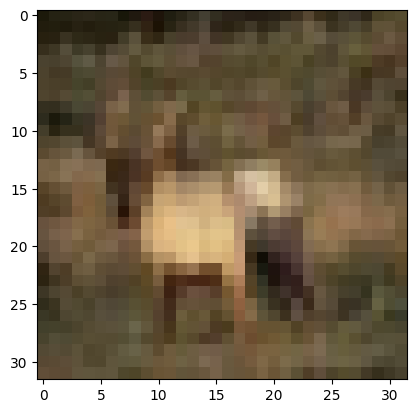

In [4]:
plt.imshow(data[b'data'].reshape(10000,3,32,32).transpose(0,2,3,1)[3])

In [7]:
from PIL import Image

save_dir = 'ImageAugmentor/img'

for i in range(100):
    img_pil = Image.fromarray(imgs[i])  # 转换为 PIL 图像
    img_pil.save(f"{save_dir}/image_{i}.png")  # 保存为 PNG 文件

In [5]:
from PIL import Image
img = Image.open("ImageAugmentor/img_output/test_ori.png")

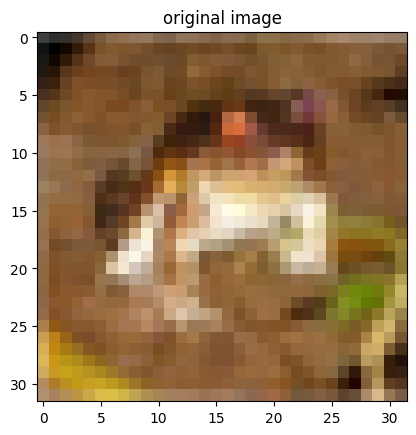

In [9]:
plt.imshow(img)
plt.title("original image")
plt.show()

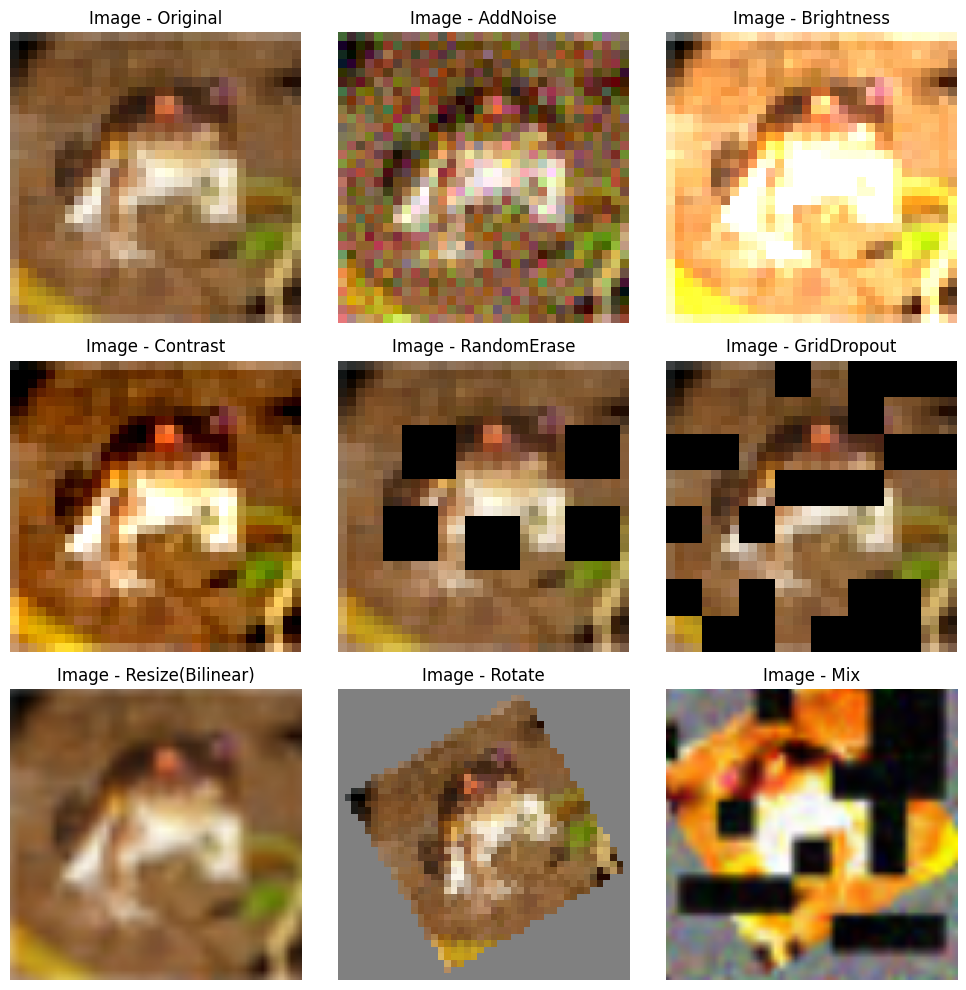

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
image_paths = ["ImageAugmentor/img_output/test_ori.png",
               "ImageAugmentor/img_output/test_addnoise.png",
               "ImageAugmentor/img_output/test_color_brightness.png",
               "ImageAugmentor/img_output/test_color_contrast.png",
               "ImageAugmentor/img_output/test_erase.png",
               "ImageAugmentor/img_output/test_grid_dropout.png",
               "ImageAugmentor/img_output/test_resize_linear.png",
               "ImageAugmentor/img_output/test_rotate.png",
               "ImageAugmentor/img_output/test_mix.png"]
image_names = [
    "Original", "AddNoise", "Brightness", "Contrast", "RandomErase", "GridDropout", "Resize(Bilinear)", "Rotate", "Mix"
]
images = [np.array(Image.open(img)) for img in image_paths]
for ax, img, idx in zip(axes.flat, images, range(9)):
    ax.imshow(img)
    ax.set_title(f"Image - {image_names[idx]}")
    ax.axis("off")  # Hide axes

plt.tight_layout()
plt.savefig("example.png")
plt.show()